In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#reference_help : https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/test-data/AAPL_test.csv
/kaggle/input/stock-price/AAPL.csv


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/stock-price/AAPL.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/31/2012,72.932854,76.485718,72.714287,76.024284,66.736229,164873100
1,1/2/2013,79.117142,79.285713,77.375717,78.432854,68.850548,140129500
2,1/3/2013,78.268570,78.524284,77.285713,77.442856,67.981491,88241300
3,1/4/2013,76.709999,76.947144,75.118568,75.285713,66.087891,148583400
4,1/7/2013,74.571426,75.614288,73.599998,74.842857,65.699158,121039100


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1263,1/5/2018,173.440002,175.369995,173.050003,175.000000,169.859406,23660000
1264,1/8/2018,174.350006,175.610001,173.929993,174.350006,169.228500,20567800
1265,1/9/2018,174.550003,175.059998,173.410004,174.330002,169.209091,21584000
1266,1/10/2018,173.160004,174.300003,173.000000,174.289993,169.170258,23959900
1267,1/11/2018,174.589996,175.490005,174.490005,175.279999,170.131180,18667700


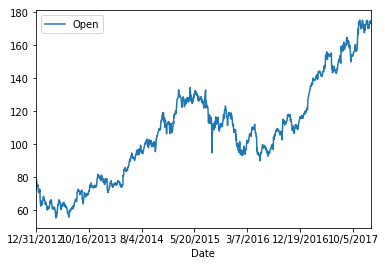

In [5]:
df.plot(x='Date', y='Open')

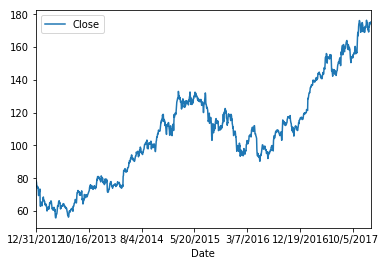

In [6]:
df.plot(x='Date', y='Close')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 7 columns):
Date         1268 non-null object
Open         1268 non-null float64
High         1268 non-null float64
Low          1268 non-null float64
Close        1268 non-null float64
Adj Close    1268 non-null float64
Volume       1268 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 69.5+ KB


In [8]:
training_data = df.iloc[0:1260,1:2].values
training_data

array([[ 72.932854],
       [ 79.117142],
       [ 78.26857 ],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

In [9]:
#data normalization......
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
training_data = scaler.fit_transform(training_data)

In [10]:
#Convert Training Data to Right Shape
features_set = []
labels = []
for i in range(60,1260) :
    features_set.append(training_data[i-60:i,0])
    labels.append(training_data[i,0])
    
#convert feature_set and labels in numpy array .....
features_set , labels = np.array(features_set) , np.array(labels)

#convert the feature_set into a 3 dimentional format.....
features_set = np.reshape(features_set, (features_set.shape[0] , features_set.shape[1] , 1))

    


In [11]:
#features_set shape......
print(features_set.shape)
print(labels.shape)


(1200, 60, 1)
(1200,)


In [12]:
#import libraries.......
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [13]:
#build a LSTM model......
model = Sequential()

model.add(LSTM(units= 50, return_sequences= True , input_shape = (features_set.shape[1], 1) ))
model.add(Dropout(0.2))
model.add(LSTM(units = 50 , return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units= 1))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [15]:
#compiling the model.....
model.compile(optimizer = 'adam' , loss = 'mean_squared_error', metrics=['accuracy'])


In [16]:
print(features_set.shape)
print(labels.shape)

(1200, 60, 1)
(1200,)


In [17]:
fitted_model =  model.fit(features_set , labels , epochs = 100 , batch_size = 32)

Epoch 1/100
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0392 - accuracy: 0.0025
Epoch 2/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0052 - accuracy: 0.0025
Epoch 3/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0048 - accuracy: 0.0025
Epoch 4/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0046 - accuracy: 0.0025
Epoch 5/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0051 - accuracy: 0.0025
Epoch 6/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0043 - accuracy: 0.0025
Epoch 7/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0042 - accuracy: 0.0025
Epoch 8/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0038 - accuracy: 0.0025
Epoch 9/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0037 - accuracy: 0.0025
Epoch 10/100
1200/1200 [==============================] - 9s 7ms/step - 

In [18]:
import pandas as pd
AAPL_test = pd.read_csv("/kaggle/input/test-data/AAPL_test.csv")
AAPL_test.info()
AAPL_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
Date         238 non-null object
Open         238 non-null float64
High         238 non-null float64
Low          238 non-null float64
Close        238 non-null float64
Adj Close    238 non-null float64
Volume       238 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.1+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,170.160004,172.300003,169.259995,172.259995,167.199890,25555900
1,2018-01-03,172.529999,174.550003,171.960007,172.229996,167.170776,29517900
2,2018-01-04,172.539993,173.470001,172.080002,173.029999,167.947266,22434600
3,2018-01-05,173.440002,175.369995,173.050003,175.000000,169.859406,23660000
4,2018-01-08,174.350006,175.610001,173.929993,174.350006,169.228500,20567800


In [19]:
testing_dataset = AAPL_test.iloc[:,1:2].values
x = pd.DataFrame(testing_dataset)
y = pd.DataFrame(training_data)
total = pd.concat([df['Open'] ,AAPL_test['Open']] , axis = 0)
print(type(total))
total = total.drop_duplicates()

<class 'pandas.core.series.Series'>


In [20]:

total.shape

(1418,)

In [21]:
#prepare the test input.......
test_inputs = total[len(total) - len(AAPL_test) - 60:].values

In [22]:
#reshape the test data........
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)


In [23]:
print(testing_dataset.shape)
print(test_inputs.shape)


(238, 1)
(298, 1)


In [24]:
test_features = []
for i in range(60, 298):
    test_features.append(test_inputs[i-60:i, 0])

In [25]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [26]:
#prediction
predictions = model.predict(test_features)

In [27]:
#inverse scale
predictions = scaler.inverse_transform(predictions)

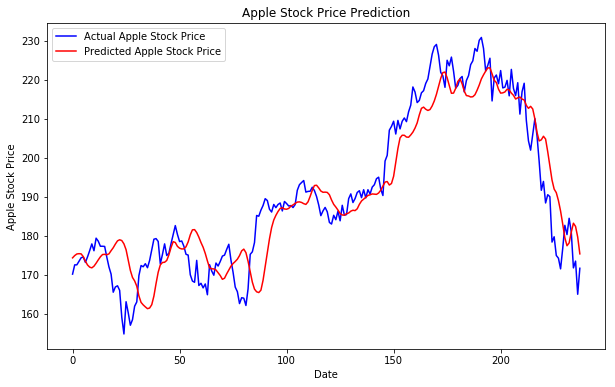

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(testing_dataset, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()